#Prasad Jawale RL Experiment 3 - Exploration vs Exploit
<B>Optimistic Initial Values</B>


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def choose_action(q_values, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice(len(q_values)) # Exploration
    else:
        return np.argmax(q_values) # Exploitation

In [ ]:
def update(q_values, action, reward, action_counts):
    action_counts[action] += 1
    # Update Q-value using sample-average method
    q_values[action] += (reward - q_values[action]) / action_counts[action]

In [ ]:
def bandit_simulation(num_arms, num_steps, epsilon, initial_value):
    q_values = np.full(num_arms, initial_value) # Initialize q-values with optimistic value
    action_counts = np.zeros(num_arms)
    rewards = []
    optimal_actions = []
    avg_rewards = []
    optimal_action_percentages = []

    for step in range(num_steps):
        action = choose_action(q_values, epsilon)
        reward = np.random.normal(q_true[action], 1) # Reward drawn from a normal distribution
        update(q_values, action, reward, action_counts)
        rewards.append(reward)
        optimal_actions.append(action == np.argmax(q_true))
        avg_rewards.append(np.mean(rewards))
        optimal_action_percentages.append(np.mean(optimal_actions))

    return rewards, optimal_actions, avg_rewards, optimal_action_percentages

**Optimistic vs Non Optimistic**

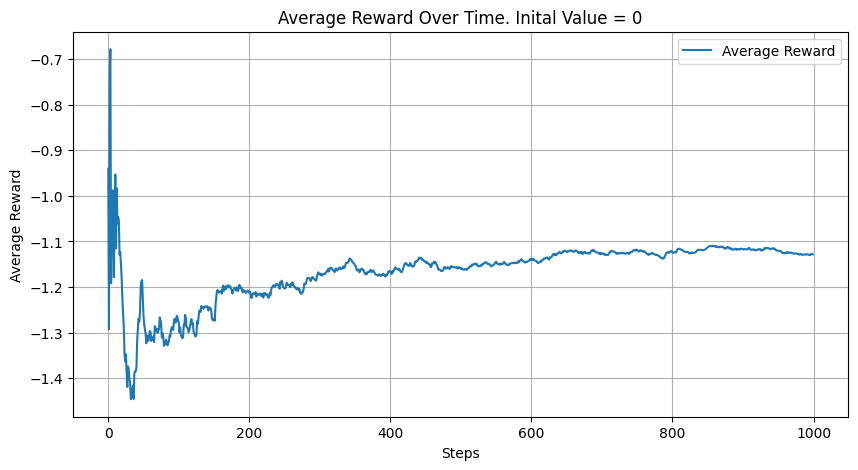

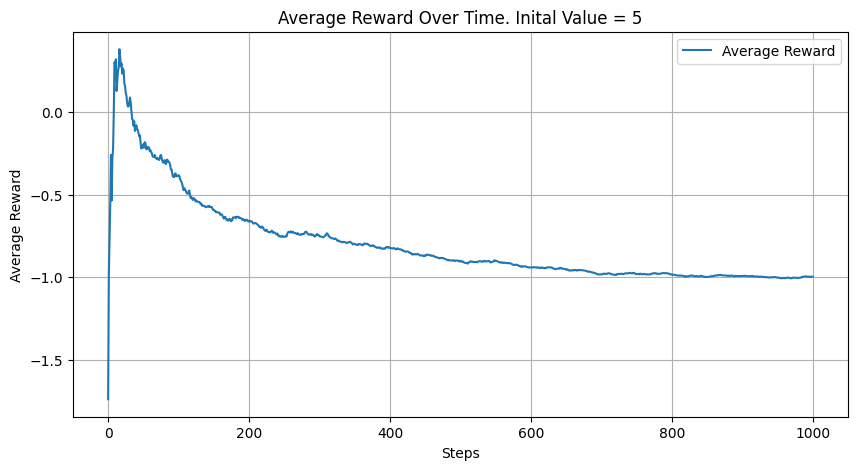

In [ ]:
num_arms = 10
num_steps = 1000
epsilon = 0.1
q_true = np.random.normal(0, 1, num_arms) # True values of the q-values

init_values = [0,5]
for values in init_values:
    rewards, optimal_actions, avg_rewards, optimal_action_percentages = bandit_simulation(num_arms, num_steps, epsilon, values)
    # Plot average reward
    plt.figure(figsize=(10, 5))
    plt.plot(avg_rewards, label='Average Reward')
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.title('Average Reward Over Time. Inital Value = ' + str(values))
    plt.legend()
    plt.grid(True)
    plt.show()